In [9]:
#import statements
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
#Reading the data
ts_day = pd.read_csv("C:/Users/lenovo/Desktop/Supervised learning/Bikesharing/day.csv")
ts_hour = pd.read_csv("C:/Users/lenovo/Desktop/Supervised learning/Bikesharing/hour.csv")


In [11]:
print("DAY data:")
print(ts_day.head())
print("/n HOUR data:")
print(ts_hour.head())

DAY data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
/n HOUR data:
  

In [12]:
#Knowing the data types of the data taken
print("Datatypes of DAY data:")
print(ts_day.dtypes)
print("\n Datatypes of HOUR data:")
print(ts_hour.dtypes)



Datatypes of DAY data:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

 Datatypes of HOUR data:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [13]:
print("Info of DAY data:")
print(ts_day.info())
print("\n Info of HOUR data:")
print(ts_hour.info())


Info of DAY data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

 Info of HOUR data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64


In [14]:
#Statistics of the data
print("DAY data:")
print(ts_day.describe())
print("\n HOUR data:")
print(ts_hour.describe())

DAY data:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233

#### Heat Map for day data and hour data

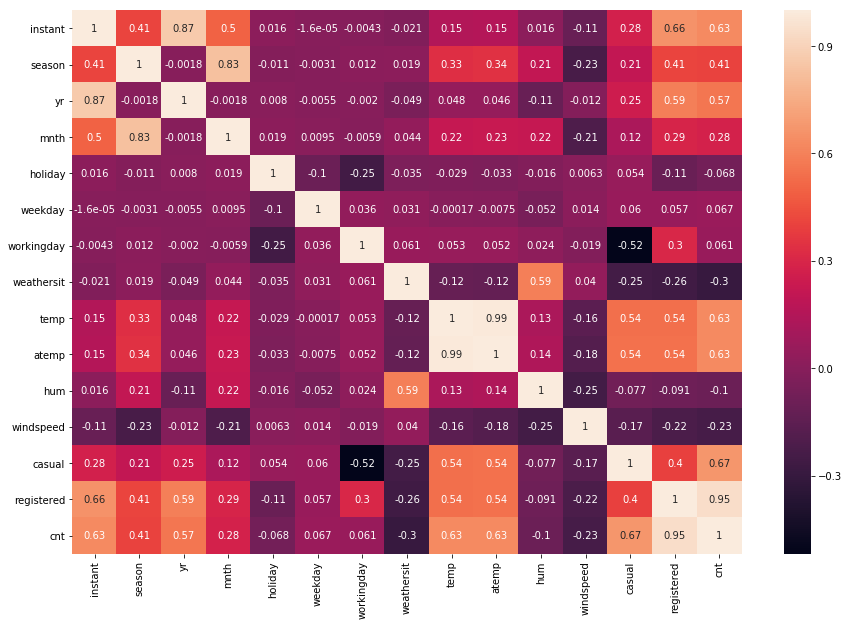

In [15]:
day_cor = ts_day.corr()
day_cor
plt.figure(figsize=(15,10))
sns.heatmap(day_cor,annot=True)
plt.show()

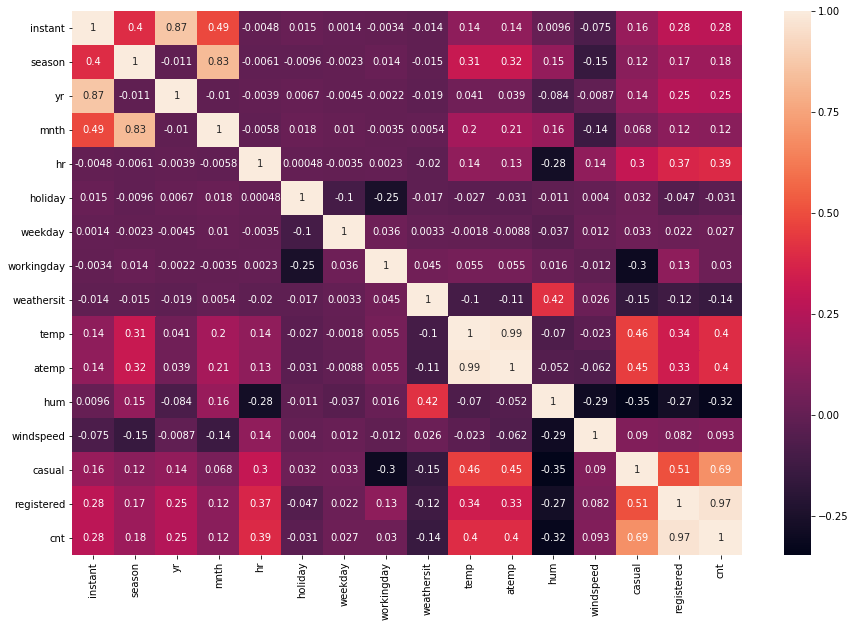

In [16]:
hour_cor = ts_hour.corr()
hour_cor
plt.figure(figsize=(15,10))
sns.heatmap(hour_cor,annot=True)
plt.show()

In [17]:
ts_hour.holiday.value_counts()


0    16879
1      500
Name: holiday, dtype: int64

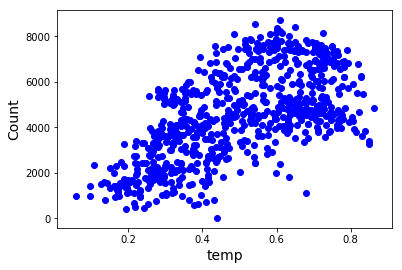

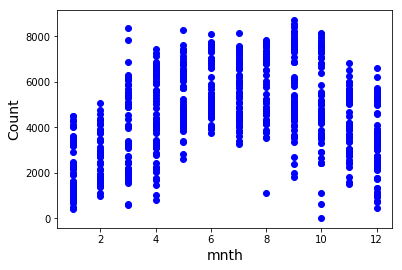

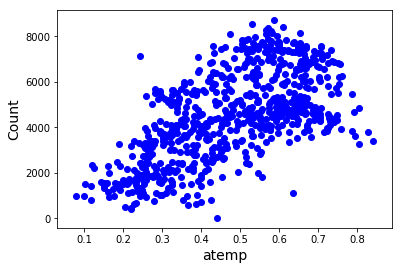

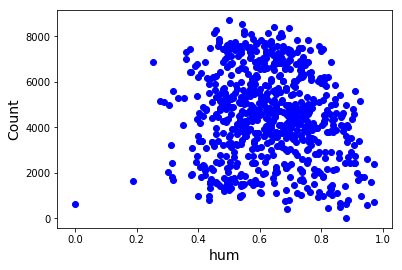

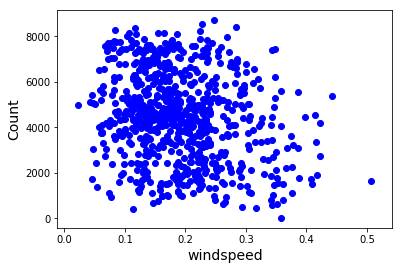

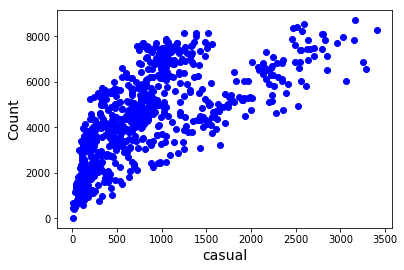

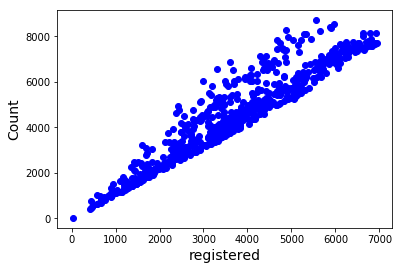

In [18]:
for i in ["temp","mnth","atemp","hum","windspeed","casual","registered"]:
    plt.scatter(ts_day[i],ts_day.cnt,color="blue")
    plt.xlabel(i,fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.show()

In [19]:
ts_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Applying Linear Regression

In [20]:
train_X,test_X,train_Y,test_Y =  train_test_split(ts_day[['temp','atemp','hum','windspeed','casual','registered']],ts_day['cnt'],test_size=0.33,random_state=19)

In [21]:
#Model
model = LinearRegression()
model.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
predictions=model.predict(test_X)

In [23]:
mse = mean_squared_error(test_Y,predictions)
print("mse:",mse)
rmse = np.sqrt(mse)
print("rmse:",rmse)


mse: 1.8414080473820325e-24
rmse: 1.3569849105211274e-12


In [24]:
r_squared = r2_score(test_Y,predictions)
print("r_squared:",r_squared)

r_squared: 1.0


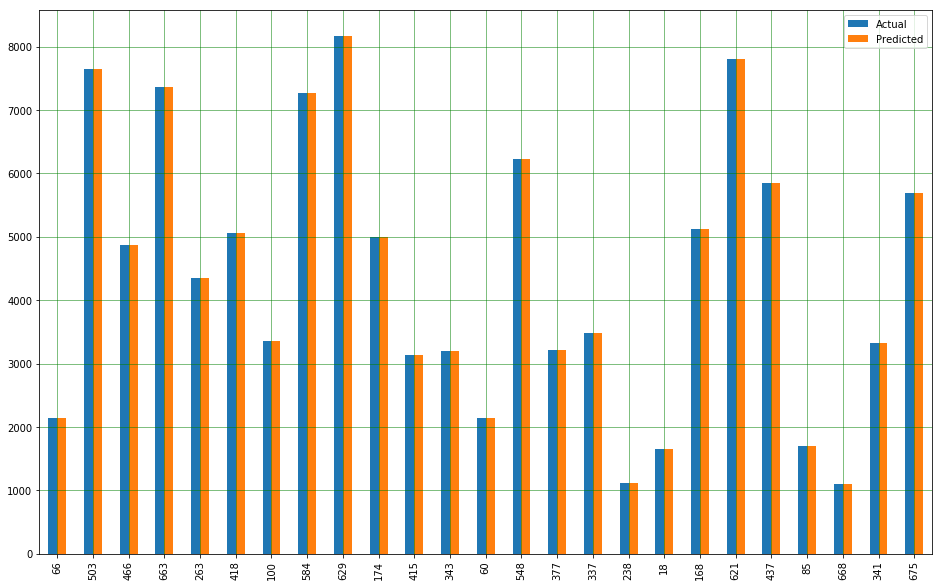

In [25]:
df = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0,0.5,'PRICE')

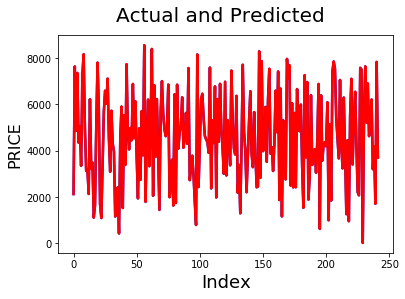

In [26]:
#Plotting predicted vs actua;
c = [i for i in range(0,242,1)]
fig = plt.figure()
plt.plot(c,test_Y, color="blue", linewidth=2.5,)
plt.plot(c,predictions, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('PRICE', fontsize=16)